<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab


## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
# Load the Boston Housing data set.
boston = boston = datasets.load_boston()
# df(features) , y(target) 
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
# Take a look at the data again.
df_with_target = df.copy()
df_with_target['MDEV'] = y
df_with_target.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# No code here please

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# what is the shape of the dataframe?
df_with_target.shape

(506, 14)

In [3]:
# No code here please

(506, 14)

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [4]:
# any missing data?
df_with_target.isnull().any().sum()

0

In [4]:
# No code here please

0

In [5]:
# Get overview of your data
df_with_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MDEV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
# No code here please

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MDEV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# Get the max for each colums
df_with_target.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MDEV        50.0000
dtype: float64

In [6]:
# No code here please

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MDEV        50.0000
dtype: float64

In [7]:
# Get the min for each colum
df_with_target.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MDEV         5.00000
dtype: float64

In [7]:
# No code here please

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MDEV         5.00000
dtype: float64

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [168]:
# get correlation in corr and use the function below to get heatmap! 
# little fancy -- good to know, not to memorize! 
#define the correalation matrix of dataset
corr = df_with_target.corr()

cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [8]:
# No code here please

In [165]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


 Separate `RM, LSTAT ,INDUS` into X.

In [8]:
#X = .......?
X = df[['RM','LSTAT','INDUS']]

In [39]:
# split the data using train_test_split, start with 50-50 split.
# Also try different parameters. <shift+tab> for doc string 

In [9]:
#perform a 50-50 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2)

In [10]:
# check the shape of your train and test sets!
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(253, 3) (253,)
(253, 3) (253,)


In [14]:
# No code here please

(253, 3) (253,)
(253, 3) (253,)


In [11]:
# Instantiate model
lr = LinearRegression()
# fit the instance on train set
lr.fit(X_train,y_train)
# get predictions and add as a new column into dataframe
predictions = lr.predict(X)
df_with_target['MDEV_pred'] = predictions
# get the train and test scores
print(lr.score(X_train, y_train),lr.score(X_test, y_test))
# Add residual column into dataframe
df_with_target['residual'] = df_with_target['MDEV'] - df_with_target['MDEV_pred']

0.5895687493144367 0.6479300537935275


Recreate the plot below....notice the type of the plot in the out cell.

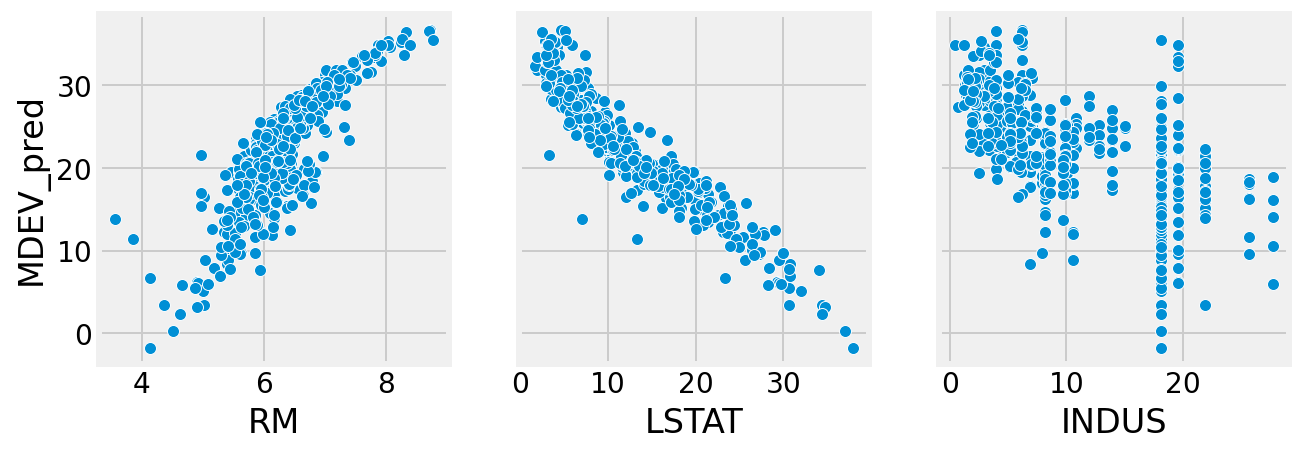

In [12]:
# code here please
#plot each predictor with MDEV_pred
fig, ax = plt.subplots(nrows=1,ncols=3,sharey=True, figsize=(9.5,3))
fig.patch.set_facecolor('White')
sns.scatterplot(ax = ax[0],x='RM',y='MDEV_pred',data=df_with_target)
sns.scatterplot(ax = ax[1],x='LSTAT',y='MDEV_pred',data=df_with_target)
sns.scatterplot(ax = ax[2],x='INDUS',y='MDEV_pred',data=df_with_target);

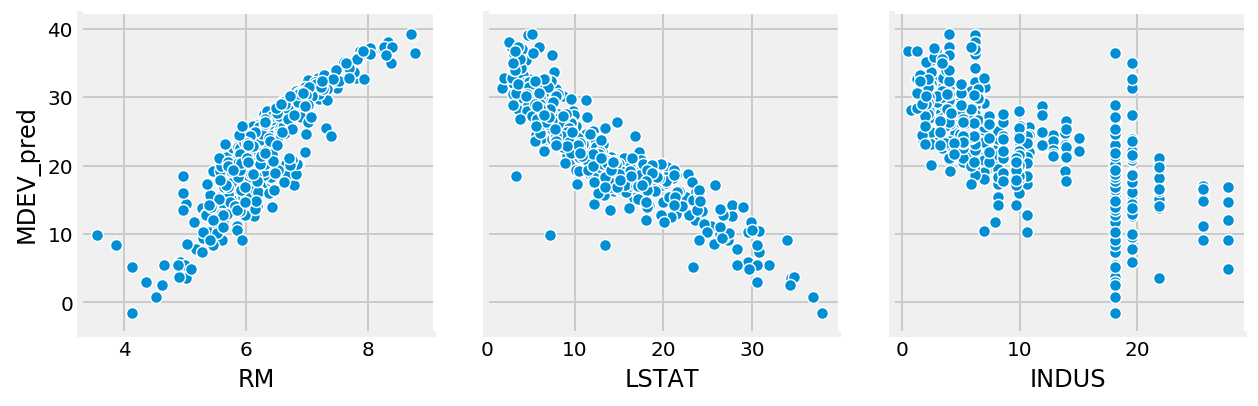

In [18]:
# No code here please

### 3) Repeat the above process with 70-30 and 90-10 splits.

- Score and plot.  
- What do you learn?

In [141]:
# with 70 - 30

0.6236680789778524 0.6740149517785912


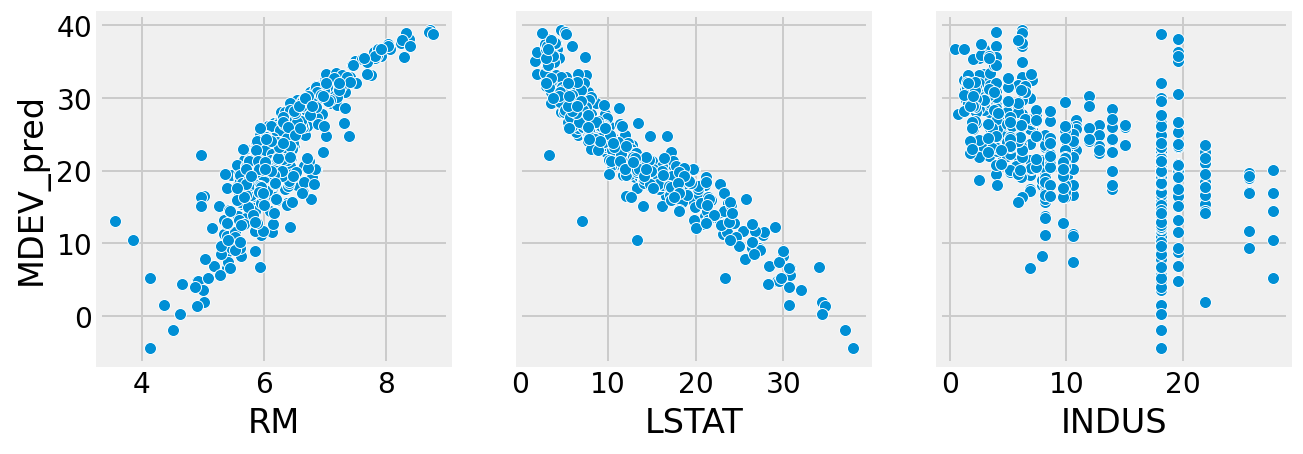

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=2)
lr.fit(X_train,y_train)
# get predictions and add as a new column into your dataframe
predictions = lr.predict(X)
df_with_target['MDEV_pred'] = predictions
# get the train and test scores
print(lr.score(X_train, y_train),lr.score(X_test, y_test))
# Add residual column into your dataframe
df_with_target['residual'] = df_with_target['MDEV'] - df_with_target['MDEV_pred']
#plot each predictor with MDEV_pred
fig, ax = plt.subplots(nrows=1,ncols=3,sharey=True, figsize=(9.5,3))
fig.patch.set_facecolor('White')
sns.scatterplot(ax = ax[0],x='RM',y='MDEV_pred',data=df_with_target)
sns.scatterplot(ax = ax[1],x='LSTAT',y='MDEV_pred',data=df_with_target)
sns.scatterplot(ax = ax[2],x='INDUS',y='MDEV_pred',data=df_with_target);

In [ ]:
# with 90 - 10

0.6397423338645769 0.6342556504126067


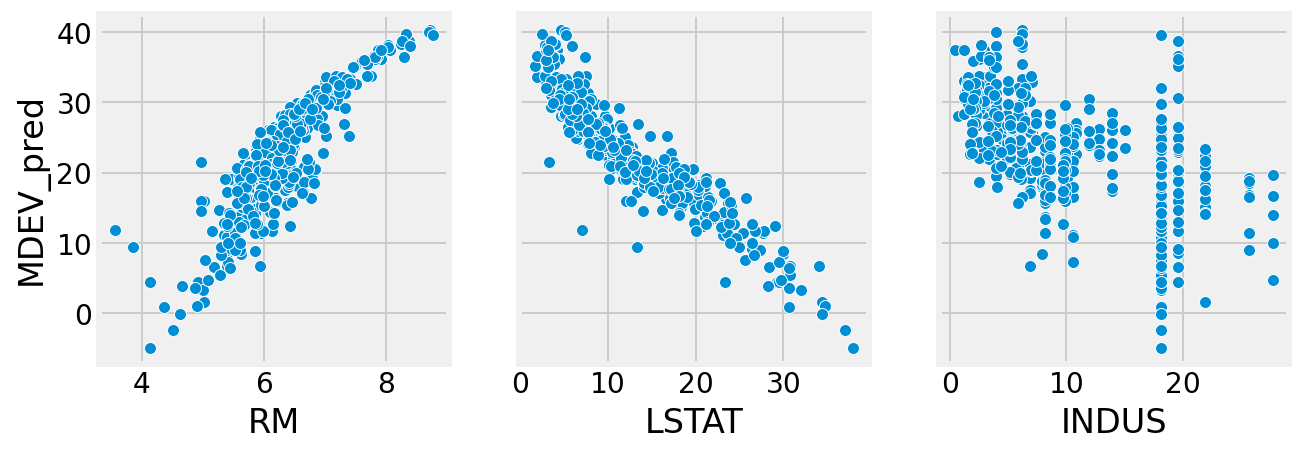

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=2)
lr.fit(X_train,y_train)
# get predictions and add as a new column into your dataframe
predictions = lr.predict(X)
df_with_target['MDEV_pred'] = predictions
# get the train and test scores
print(lr.score(X_train, y_train),lr.score(X_test, y_test))
# Add residual column into your dataframe
df_with_target['residual'] = df_with_target['MDEV'] - df_with_target['MDEV_pred']
#plot each predictor with MDEV_pred
fig, ax = plt.subplots(nrows=1,ncols=3,sharey=True, figsize=(9.5,3))
fig.patch.set_facecolor('White')
sns.scatterplot(ax = ax[0],x='RM',y='MDEV_pred',data=df_with_target)
sns.scatterplot(ax = ax[1],x='LSTAT',y='MDEV_pred',data=df_with_target)
sns.scatterplot(ax = ax[2],x='INDUS',y='MDEV_pred',data=df_with_target);

Is the score changes? Now you have tired three different splits, please make comments according to your understanding. Recall the lectures and try!

<b style="color:blue;">Answer:</b> Yes, the score has been changed in all splits. Also, the changes show the model has the highest score in 70-30 split which predict with less error compared the other models.

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- Try out different folds to get a sense of how this impacts your score.

In [15]:
# A:
from sklearn.model_selection import KFold, cross_val_score , cross_val_predict

In [16]:
# Perform 5-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())    

Cross-validated scores: [0.3411921  0.71618049 0.52831764 0.66559103 0.60439579]
Mean of Cross-validated scores: 0.5711354108514144


In [17]:
# Perform 7-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scores = cross_val_score(lr, X_train, y_train, cv=7)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())

Cross-validated scores: [0.32731036 0.70200254 0.58853551 0.69656372 0.57097512 0.61734767
 0.62284961]
Mean of Cross-validated scores: 0.5893692203868811


In [18]:
# Perform 9-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scores = cross_val_score(lr, X_train, y_train, cv=9)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())

Cross-validated scores: [0.47366906 0.31951002 0.72126895 0.44665465 0.65807104 0.52003017
 0.64766382 0.59485207 0.64103153]
Mean of Cross-validated scores: 0.5580834793401473


<b style="color:blue;">Answer:</b> The optimal k-fold of cross-validation is 7. The score has been changed significantly in all corss-validations because of impact of correaltion bewteen predictors in data partitions that mask the data pattern. 